# EDA

## Imports

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


## Why EDA

- Model Building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- Feature Engineering
- Detecting Outliers

## Columns Types

- **Numerical** `Age`, `Fare`, `PassengerId`
- **Categorical** `Survived`, `Pclass`, `Sex`,`SibSp`,`Parch`,`Embarked`
- **Mixed** `Name`, `Ticket`, `Cabin`

## Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency(Mean|Median|Mode), and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

**The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:**

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.
- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

**Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df_train.drop(['Cabin'], axis=1, inplace=True)

In [7]:
df_test.drop(['Cabin'], axis=1, inplace=True)

#### Age

In [8]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

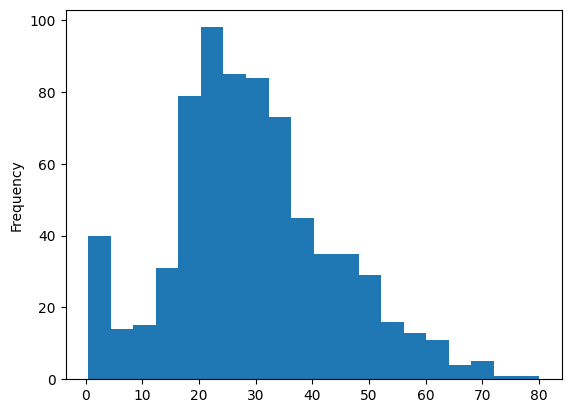

In [10]:
df_train['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Frequency'>

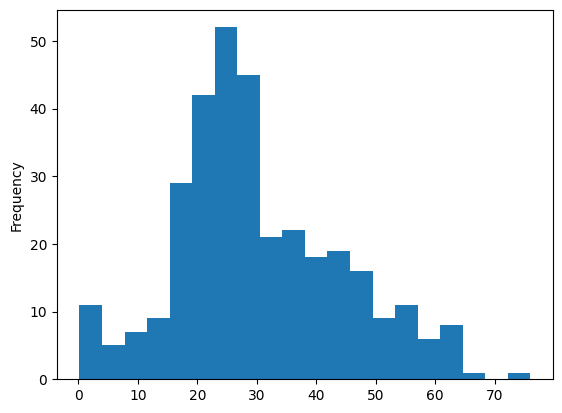

In [11]:
df_test['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

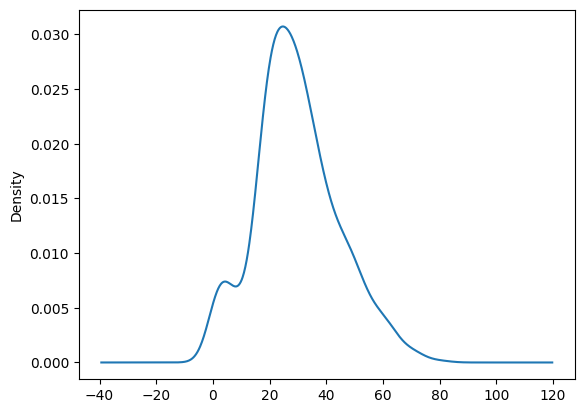

In [12]:
df_train['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

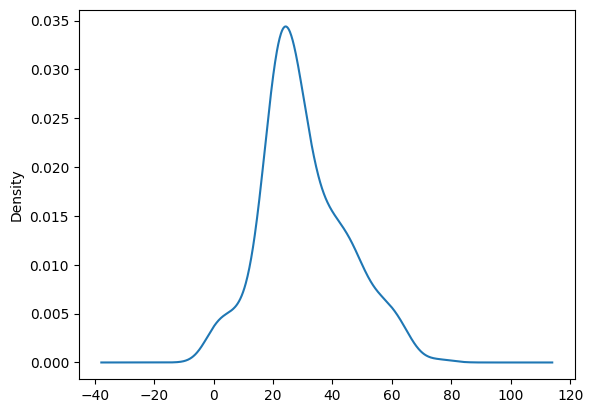

In [13]:
df_test['Age'].plot(kind='kde')

In [14]:
df_train['Age'].skew()

0.38910778230082704

In [15]:
df_test['Age'].skew()

0.4573612871503845

<Axes: >

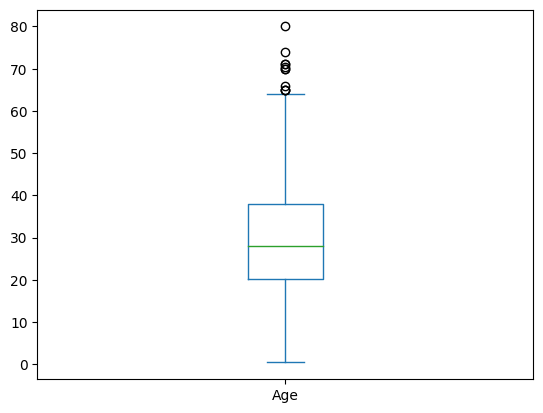

In [16]:
df_train['Age'].plot(kind='box')

<Axes: >

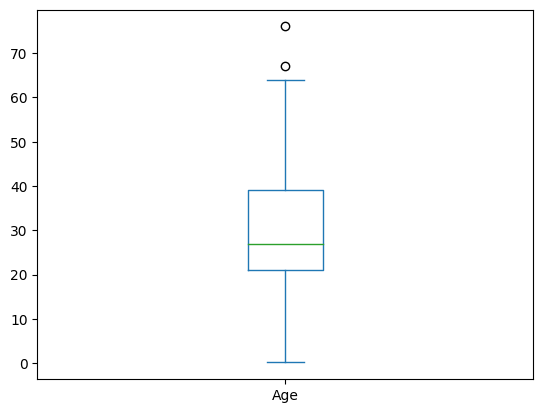

In [17]:
df_test['Age'].plot(kind='box')

In [18]:
df_train['Age'].isnull().sum()

177

In [19]:
df_test['Age'].isnull().sum()

86

##### Conclusion

- `Age` is almost normally distributed
- 20% of the values are missing
- There are some outliers

In [20]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age, axis =1 )

In [21]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
df_test['Age']=df_test[['Age','Pclass']].apply(impute_age, axis =1 )

#### Fare

In [22]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

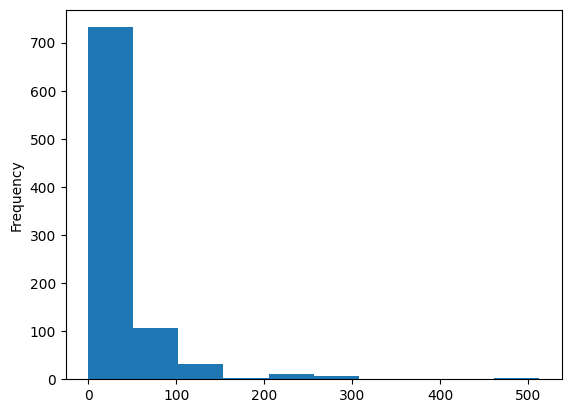

In [24]:
df_train['Fare'].plot(kind='hist')

<Axes: ylabel='Frequency'>

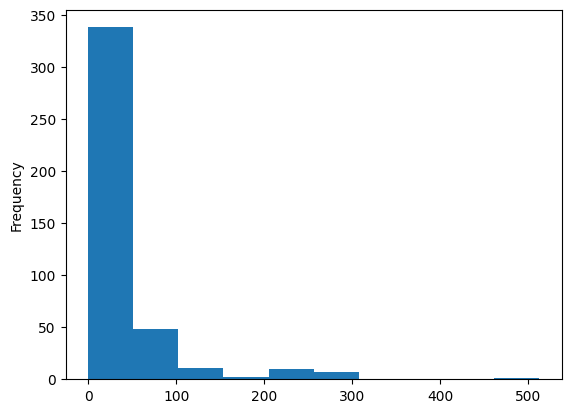

In [25]:
df_test['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

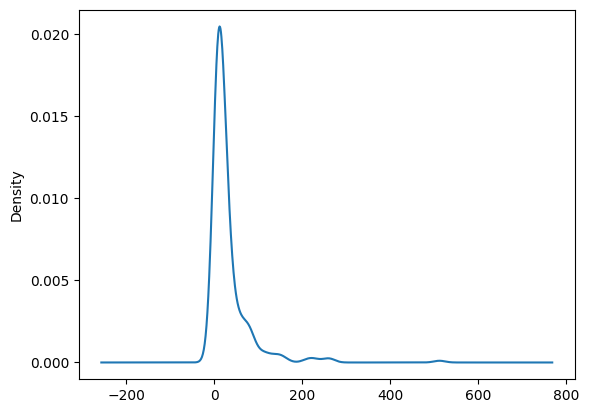

In [26]:
df_train['Fare'].plot(kind='kde')

<Axes: ylabel='Density'>

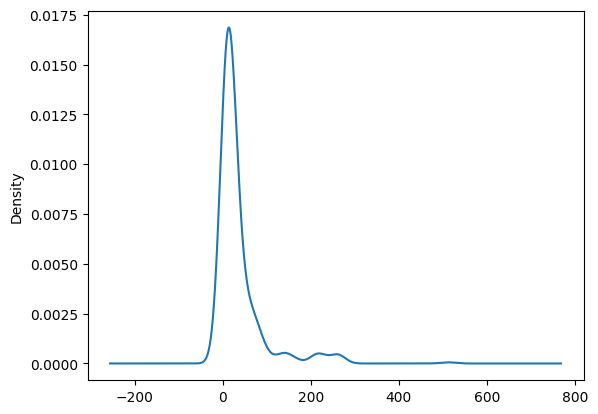

In [27]:
df_test['Fare'].plot(kind='kde')

In [28]:
df_train['Fare'].skew()

4.787316519674893

In [29]:
df_test['Fare'].skew()

3.6872133081121405

<Axes: >

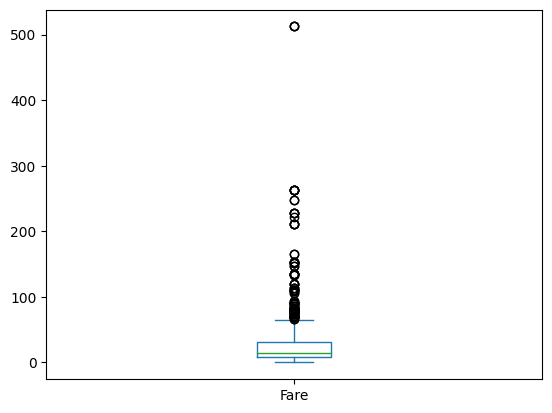

In [30]:
df_train['Fare'].plot(kind='box')

<Axes: >

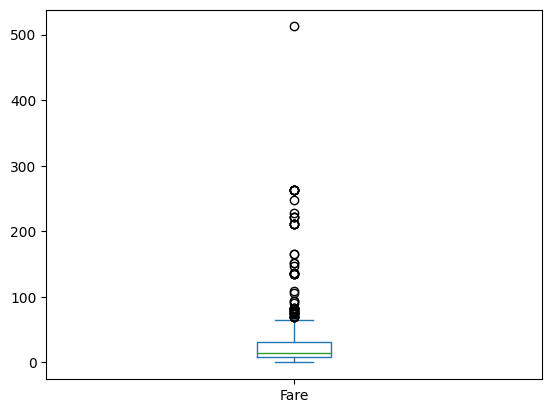

In [31]:
df_test['Fare'].plot(kind='box')

In [32]:
df_train[df_train['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,C


In [33]:
df_test[df_test['Fare']>250]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,C
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,C


In [34]:
df_train['Fare'].isnull().sum()

0

In [35]:
df_test['Fare'].isnull().sum()

1

In [36]:
df_test[df_test['Fare'].isnull()].index[0]

152

In [37]:
df_test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Embarked                        S
Name: 152, dtype: object

#### Conclusion

- Data is highly +ve skewed
- Fare col actually contains the group fare and not the individual fare.(Issue)
- We need to create a new col `individual_fare`

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### Survived

In [38]:
df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [39]:
df_test_y = pd.read_csv('gender_submission.csv')
df_test_y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
df_test_y.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived'>

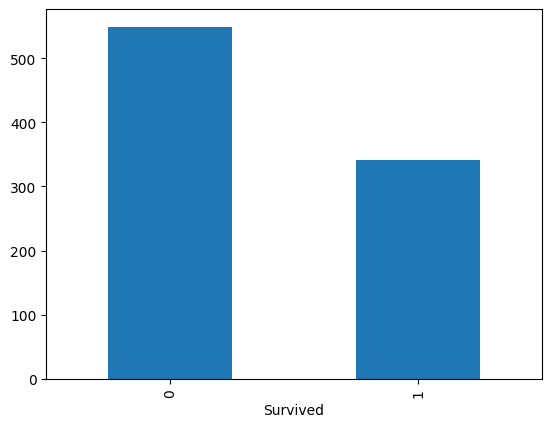

In [41]:
df_train.Survived.value_counts().plot(kind='bar')

<Axes: xlabel='Survived'>

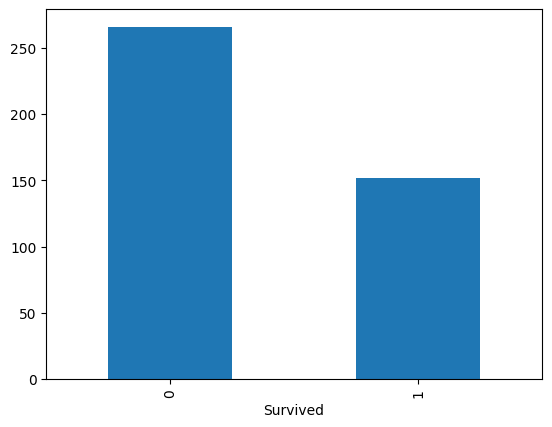

In [42]:
df_test_y.Survived.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

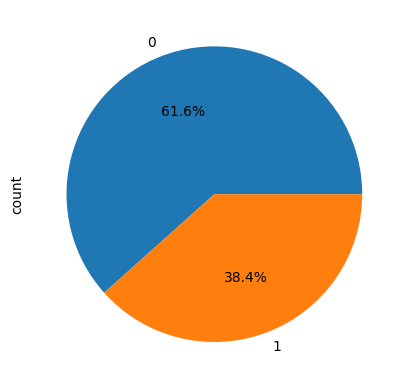

In [43]:
df_train.Survived.value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

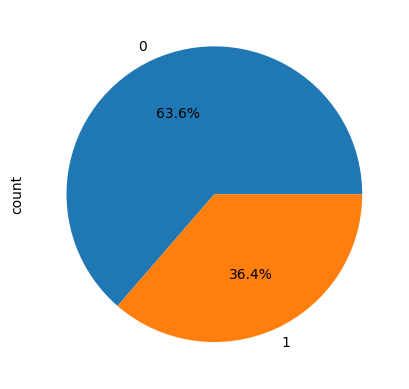

In [44]:
df_test_y.Survived.value_counts().plot(kind='pie',autopct='%0.1f%%')

##### Conclusion

- Majority of the peoples died in Titanic
- There are no missing values

#### Pclass

<Axes: xlabel='Pclass'>

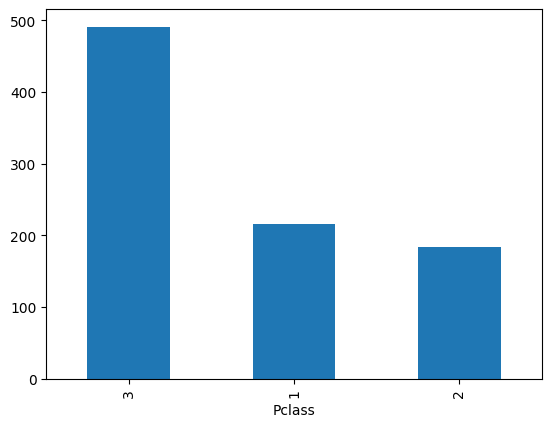

In [45]:
df_train['Pclass'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass'>

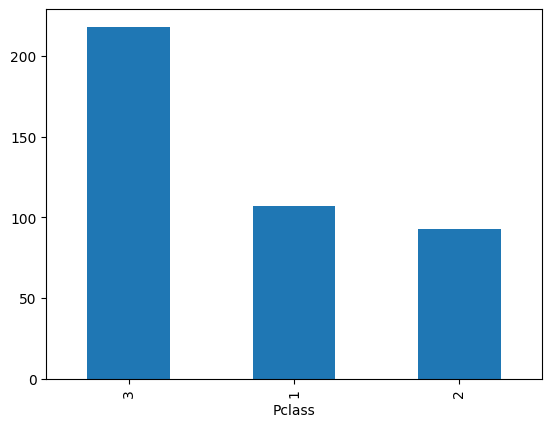

In [46]:
df_test['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

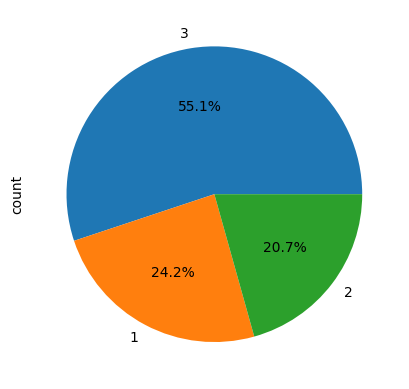

In [47]:
df_train['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

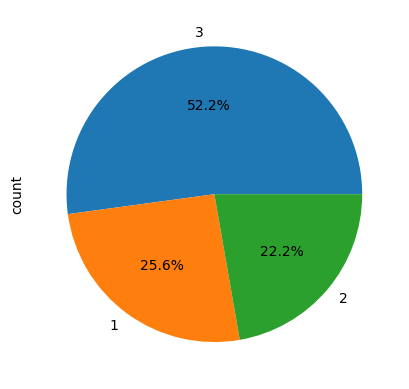

In [48]:
df_test['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [49]:
df_train['Pclass'].isnull().sum()

0

In [50]:
df_test['Pclass'].isnull().sum()

0

##### Conclusion

- Majority peoples travelled in class 3 but in class 1 there are few people more than class 2
- There are no missing values

#### Sex

<Axes: xlabel='Sex'>

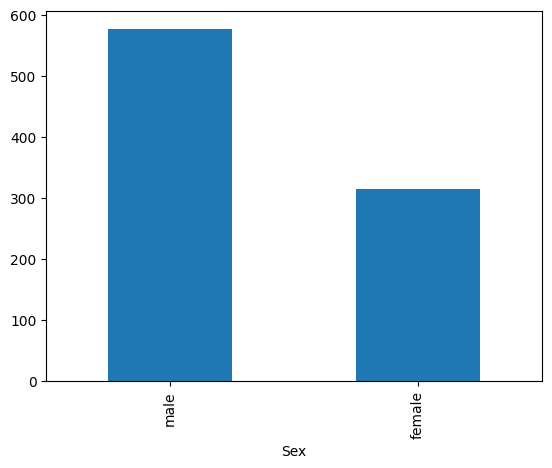

In [51]:
df_train['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

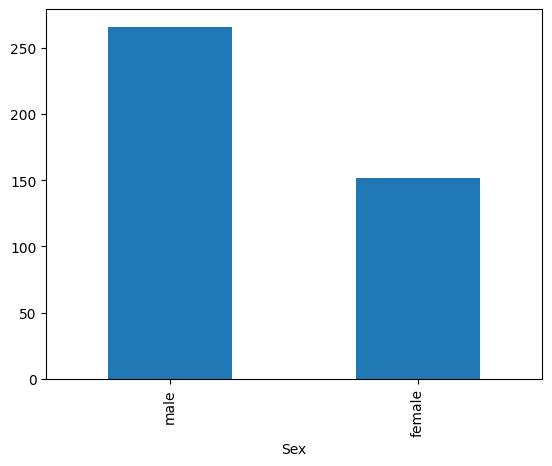

In [52]:
df_test['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

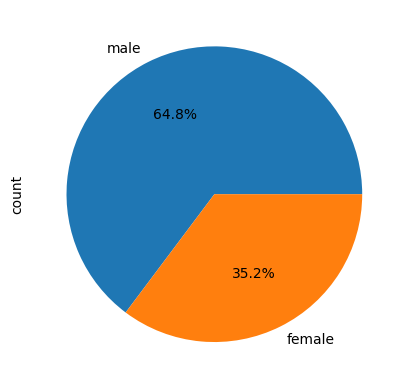

In [53]:
df_train['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

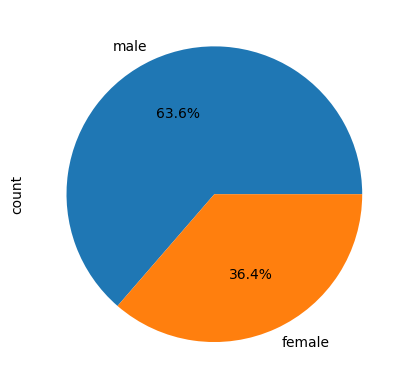

In [54]:
df_test['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [55]:
df_train['Sex'].isnull().sum()

0

In [56]:
df_test['Sex'].isnull().sum()

0

##### Conclusion

- Majority of travelers are male
- There are no missing values

#### SibSp

<Axes: xlabel='SibSp'>

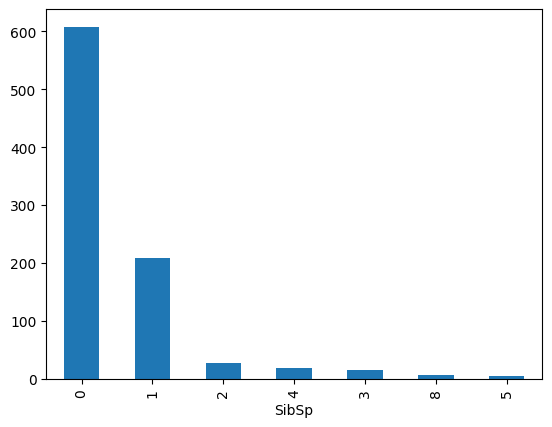

In [57]:
df_train['SibSp'].value_counts().plot(kind='bar')

<Axes: xlabel='SibSp'>

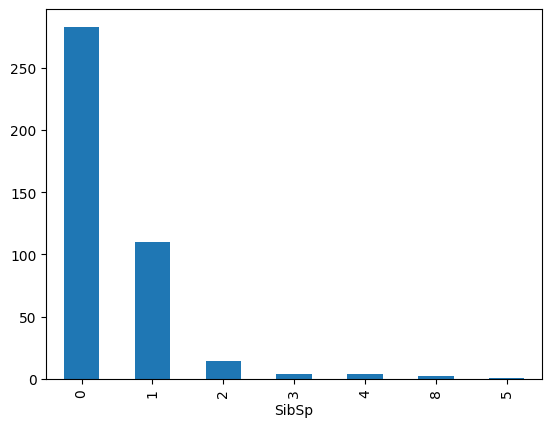

In [58]:
df_test['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

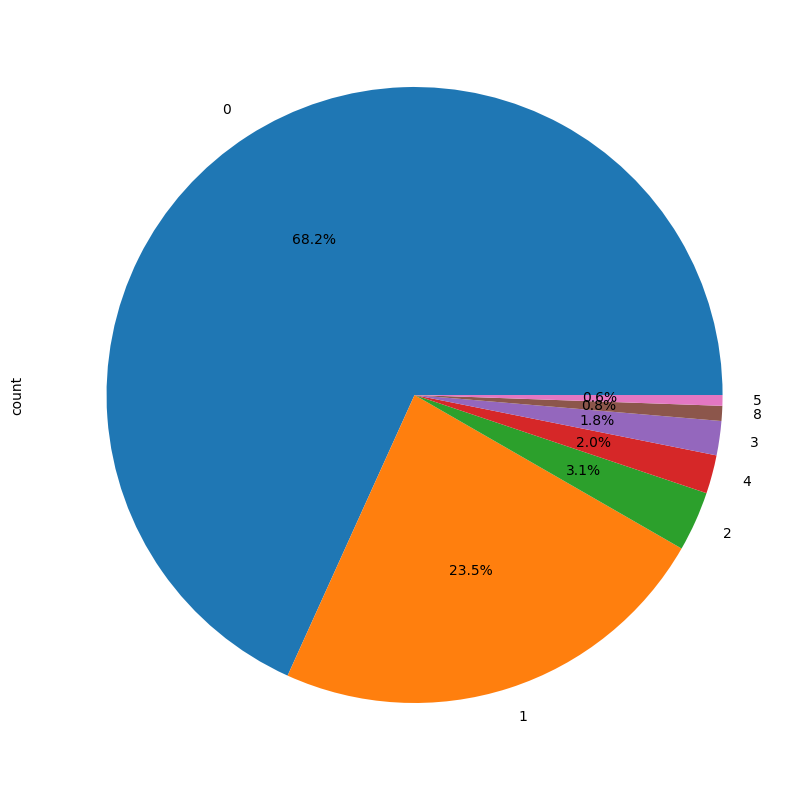

In [59]:
plt.figure(figsize=(10,10))
df_train['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

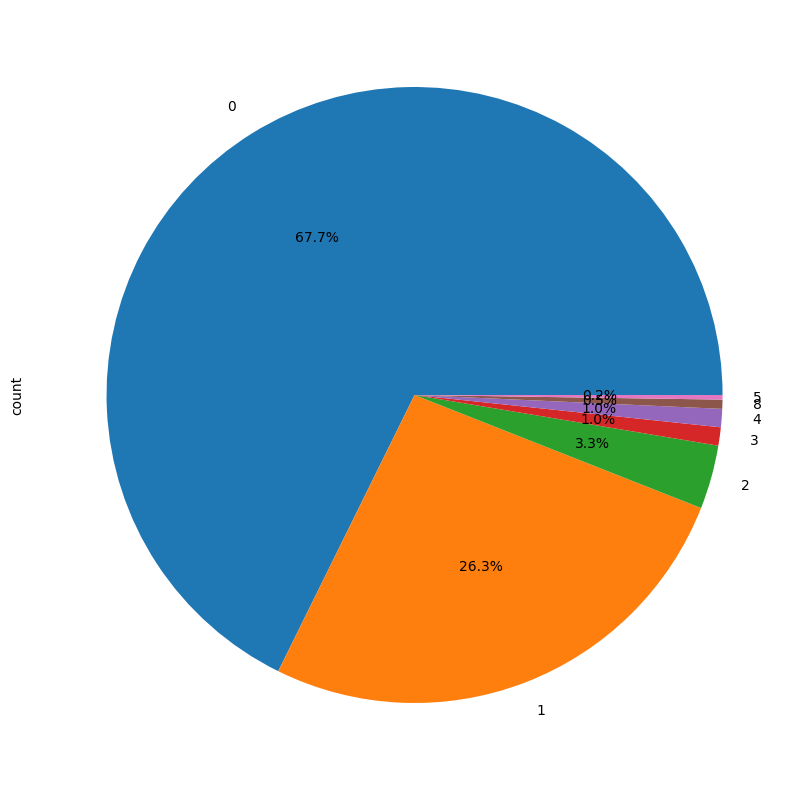

In [60]:
plt.figure(figsize=(10,10))
df_test['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [61]:
df_train['SibSp'].isnull().sum()

0

In [62]:
df_test['SibSp'].isnull().sum()

0

##### Conclusion

- Majority of travelers are solo Travelers.
- There are no missing values

#### Parch

<Axes: xlabel='Parch'>

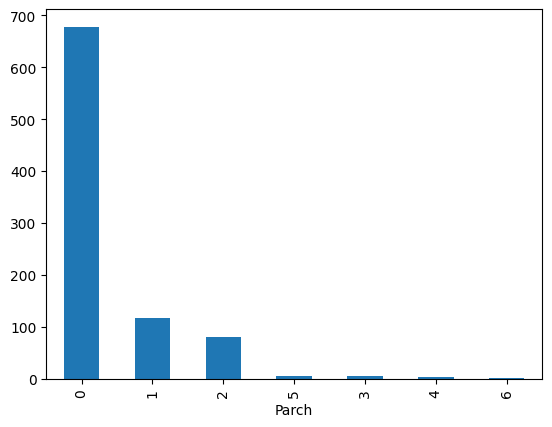

In [63]:
df_train['Parch'].value_counts().plot(kind='bar')

<Axes: xlabel='Parch'>

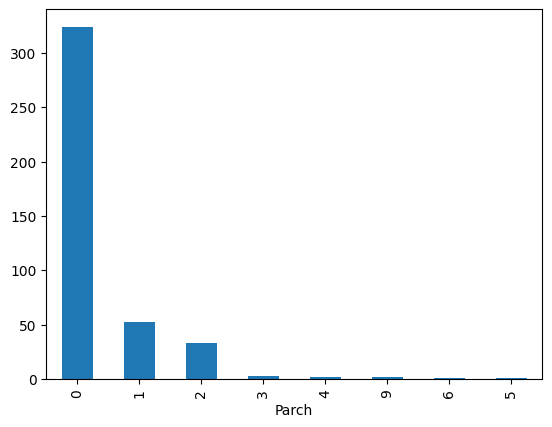

In [64]:
df_test['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

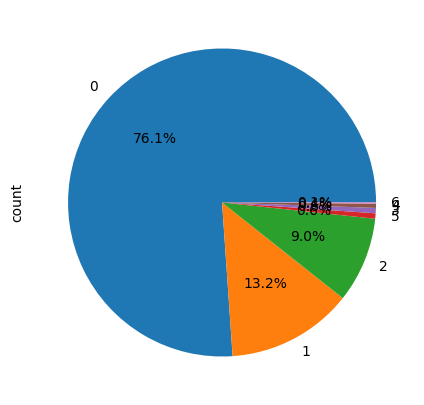

In [65]:
plt.figure(figsize=(5,5))
df_train['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

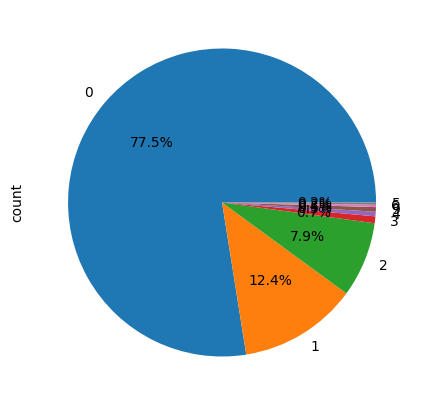

In [66]:
plt.figure(figsize=(5,5))
df_test['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [67]:
df_train['Parch'].isnull().sum()

0

In [68]:
df_test['Parch'].isnull().sum()

0

##### Conclusion

- Majority of travelers have no family
- There are no missing values
- `Parch` and `SibSp` can be merged to form new col `family_size`
- Create new col `is_alone`

#### Embarked

<Axes: xlabel='Embarked'>

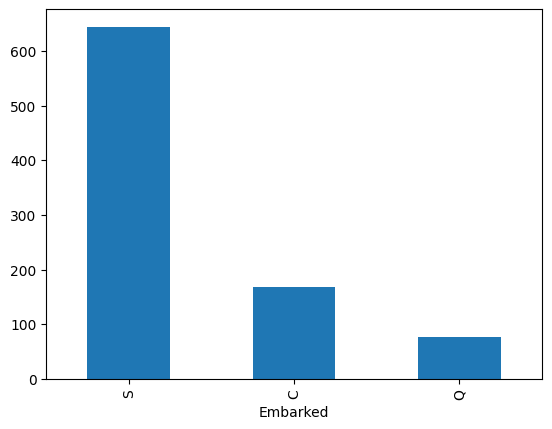

In [69]:
df_train['Embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='Embarked'>

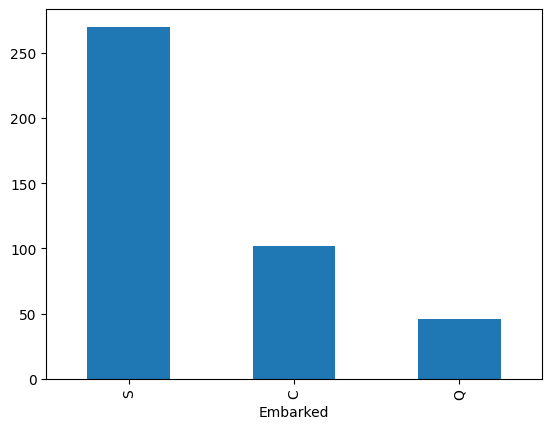

In [70]:
df_test['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

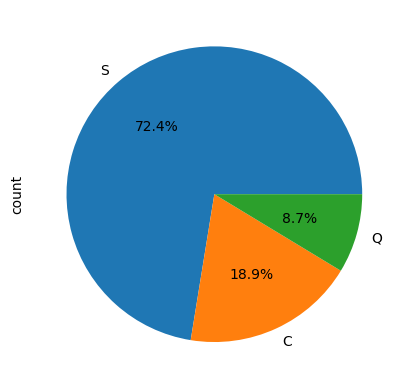

In [71]:
df_train['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

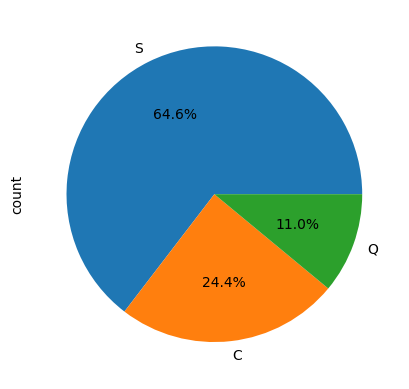

In [72]:
df_test['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [73]:
df_train['Embarked'].isnull().sum()

2

In [74]:
df_test['Embarked'].isnull().sum()

0

##### Conclusion

- Most passengers from Southampton
- 2 missing values

### Mixed Features

- Needs some feature engineering

## Bivariate Analysis

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

### Survived and Pclass (Cat-Cat)

In [75]:
pd.crosstab(df_train['Survived'],df_train['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


#### Conclusion

- Pclass 3 is the most dangerous class
- Safest class is Pclass 1

### Survived and Sex (Cat-Cat)

In [76]:
pd.crosstab(df_train['Survived'],df_train['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


#### Conclusion

- Males deaths are more than females

### Survived and Embarked (Cat-Cat)

In [77]:
pd.crosstab(df_train['Survived'],df_train['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


#### Conclusion

In [78]:
pd.crosstab(df_train['Sex'],df_train['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [79]:
pd.crosstab(df_train['Pclass'],df_train['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


- Most deaths belongs to Southampton because most people of this city were traveling in Pclass 3. The dangerous class.


### Survived and Age (Cat-Num)

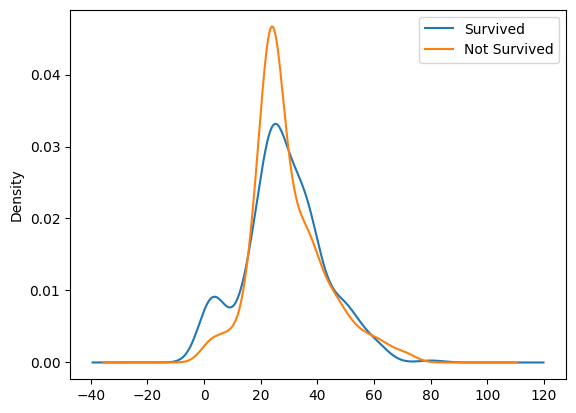

In [80]:
df_train.query('Survived==1')['Age'].plot(kind='kde',label='Survived')
df_train.query('Survived==0')['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()

In [81]:
df_train.query('Pclass==1')['Age'].mean()

38.06212962962963

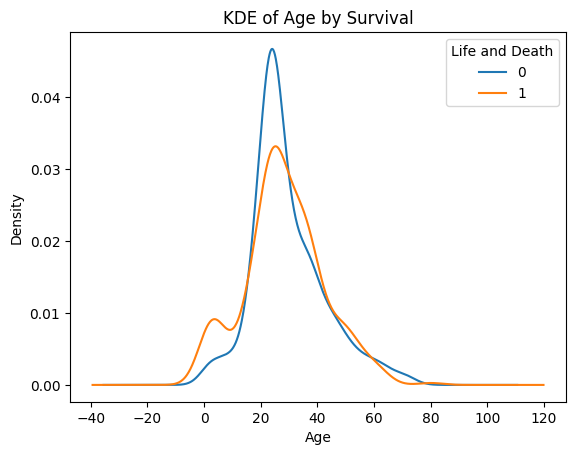

In [82]:
for label, group in df_train.groupby('Survived'):
    group['Age'].plot(kind='kde', label=f'{label}')

# Add legend
plt.legend(title='Life and Death')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE of Age by Survival')
plt.show()

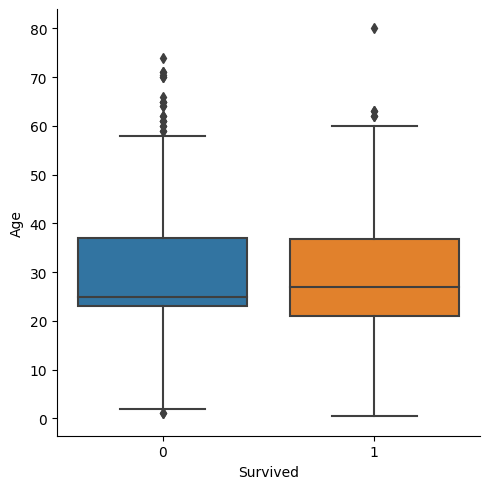

In [83]:
sns.catplot(data=df_train.reset_index(),x='Survived',y='Age',kind='box')

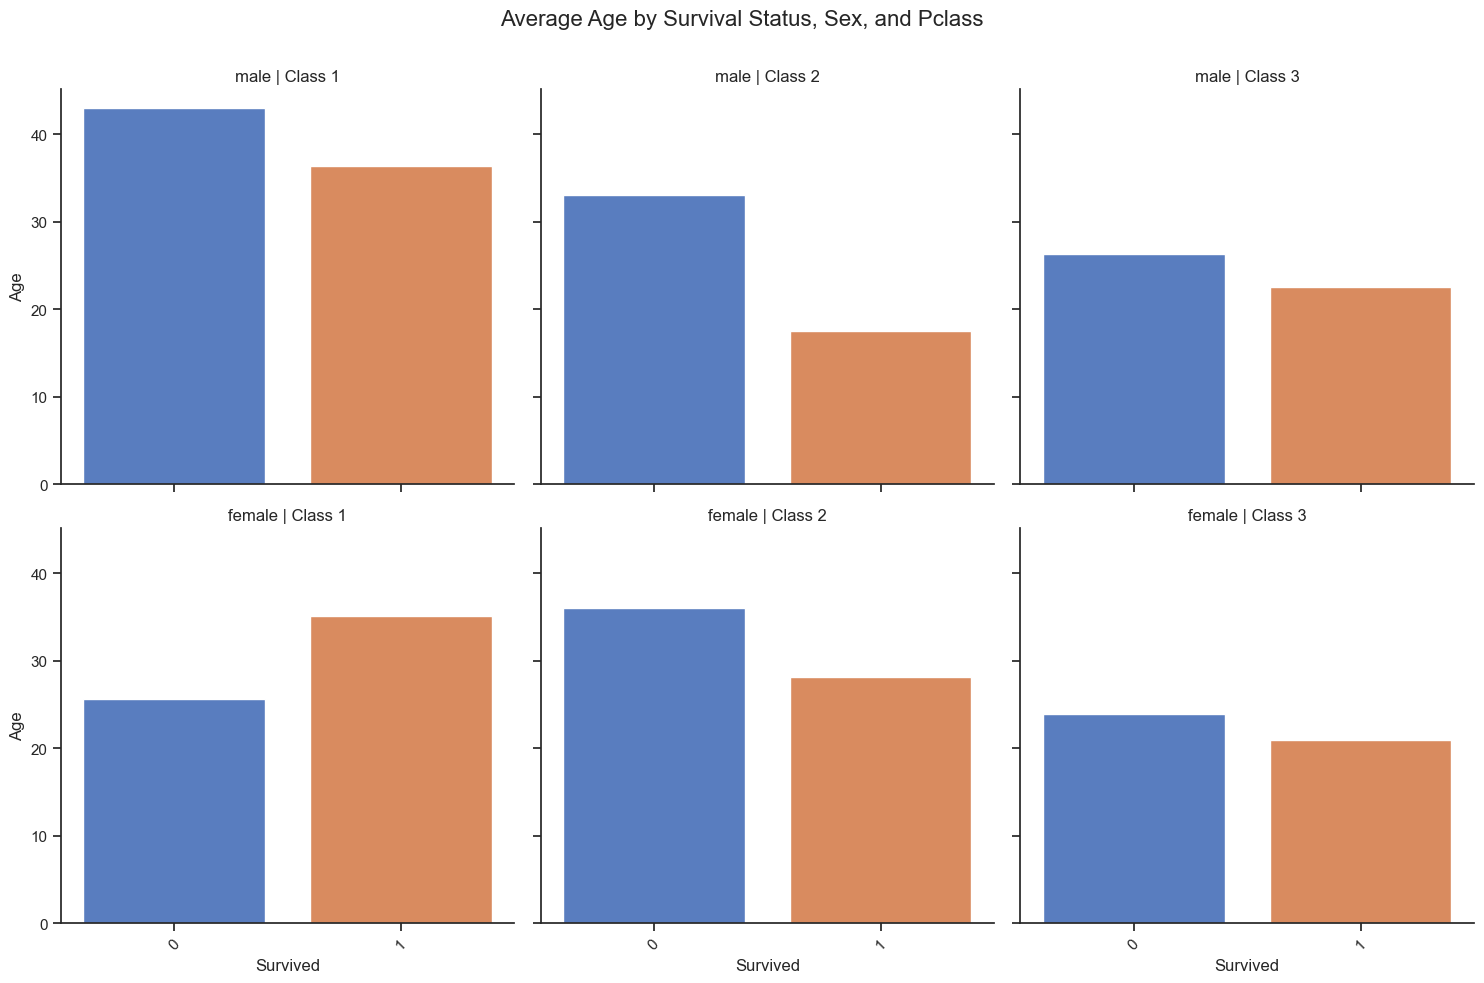

In [84]:
sns.set_theme(style="ticks")
g=sns.catplot(data=df_train,x='Survived',y='Age',row='Sex',col='Pclass',kind='bar',errorbar=None,
           palette='muted',aspect=1)
# Add titles and labels
g.set_titles("{row_name} | Class {col_name}")
g.set_axis_labels("Survived", "Age")
g.fig.suptitle('Average Age by Survival Status, Sex, and Pclass', fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xticklabels(['0', '1'], rotation=45)

# Show the plot
plt.show()

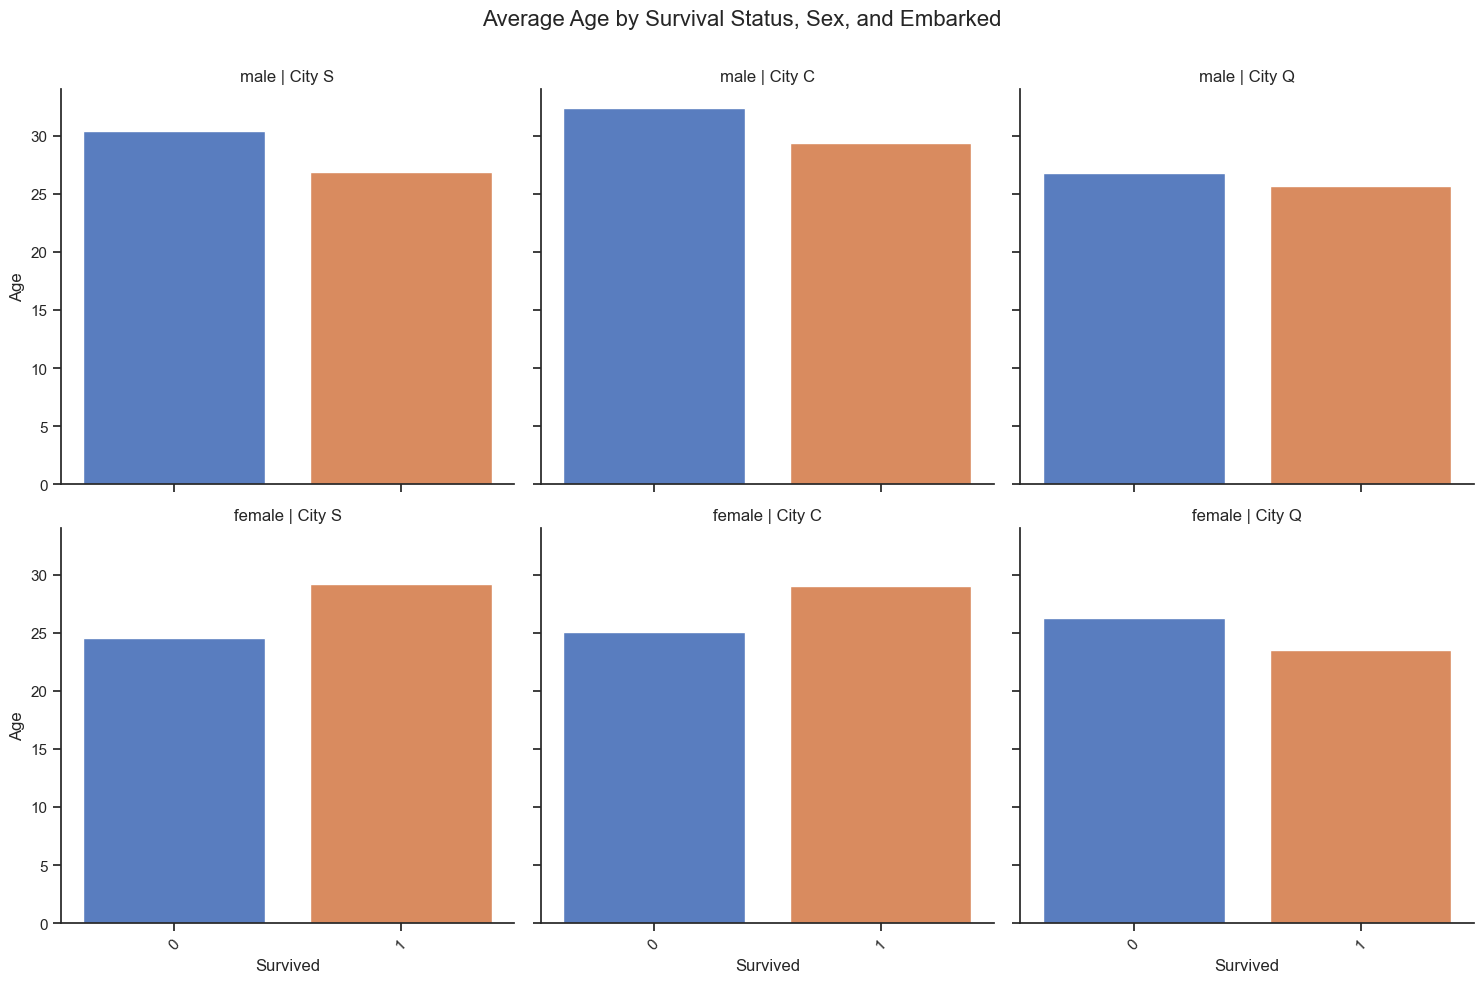

In [85]:
sns.set_theme(style="ticks")
g=sns.catplot(data=df_train,x='Survived',y='Age',row='Sex',col='Embarked',kind='bar',errorbar=None,
           palette='muted',aspect=1)
# Add titles and labels
g.set_titles("{row_name} | City {col_name}")
g.set_axis_labels("Survived", "Age")
g.fig.suptitle('Average Age by Survival Status, Sex, and Embarked', fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xticklabels(['0', '1'], rotation=45)

# Show the plot
plt.show()

In [86]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [87]:
sex_train = pd.get_dummies(df_train['Sex'], drop_first = True)

In [88]:
df_train = pd.concat([df_train, sex_train], axis = 1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True


In [89]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket','Embarked','Sex'], axis=1)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,24.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


In [90]:
sex_test = pd.get_dummies(df_test['Sex'], drop_first = True)

In [91]:
df_test = pd.concat([df_test, sex_test], axis = 1)

In [92]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket','Embarked','Sex'], axis=1)
df_test

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,True
1,3,47.0,1,0,7.0000,False
2,2,62.0,0,0,9.6875,True
3,3,27.0,0,0,8.6625,True
4,3,22.0,1,1,12.2875,False
...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,True
414,1,39.0,0,0,108.9000,False
415,3,38.5,0,0,7.2500,True
416,3,24.0,0,0,8.0500,True


In [93]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

X_test = df_test
y_test = df_test_y['Survived']

In [94]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(891, 6)
(891,)
(418, 6)
(418,)


In [96]:
def find_best_model(X_train, X_test, y_train, y_test):
    # Logistic Regression
    logreg = LogisticRegression(max_iter = 600, random_state = 42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    logreg_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state = 42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    decision_tree_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # Random Forest
    random_forest = RandomForestClassifier(random_state = 42)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    random_forest_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # XGBoost
    xgb = XGBClassifier(random_state = 42)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # GBM
    gbm = GradientBoostingClassifier(random_state = 42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    gbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # LightGBM
    lgbm = LGBMClassifier(random_state = 42)
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_test)
    lgbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        
    # Catboost
    catb = CatBoostClassifier(verbose = 0, random_state = 42)
    catb.fit(X_train, y_train)
    y_pred = catb.predict(X_test)
    catb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # Histogram-based Gradient Boosting Classification Tree
    hgb = HistGradientBoostingClassifier(random_state = 42)
    hgb.fit(X_train, y_train)
    y_pred = hgb.predict(X_test)
    hgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GBM', 'LightGBM', 'Catboost', 'HistBoost'],
                       'Score': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gbm_acc, lgbm_acc, catb_acc, hgb_acc]})
    print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

In [97]:
find_best_model(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                 Model  Score
0  Logistic Regression  93.78
1                  GBM  89.71
2             Catboost  89.23
3              XGBoost  84.93
4             LightGBM  83.25
5            HistBoost  83.25
6        Random Forest  81.58
7        Decision Tree  78.47
